In [26]:
import tensorflow as tf
import numpy as np
import matplotlib.pyplot as plt

In [27]:
tf.random.set_seed(2021)

In [40]:
x_train = [[1., 2.],
           [2., 3.],
           [3., 1.],
           [4., 3.],
           [5., 3.],
           [6., 2.],
          ]

y_train = [[0.],
          [0.],
          [0.],
          [1.],
          [1.],
          [1.]
          ]

x_test = [[5., 2.], [1, 1]]
y_test = [[1.], [0.]]

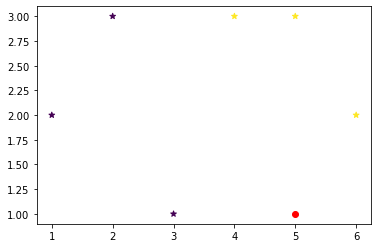

In [41]:
x1 = [x[0] for x in x_train]
x2 = [x[1] for x in x_train]
colors=[int(y[0]) for y in y_train]

plt.scatter(x1, x2, c=colors, marker='*')
plt.scatter(x_test[0][0], y_test[0], c='red')

In [42]:
dataset = tf.data.Dataset.from_tensor_slices((x_train, y_train)).batch(len(x_train))
W = tf.Variable(tf.zeros([2,1]), name='weight')
b = tf.Variable(tf.zeros([1,1]), name='bias')

### sigmoid

In [43]:
def logistic_regression(features):
    hypothesis = tf.divide(1.,1.+tf.exp(tf.matmul(features, W)+b))
    return hypothesis

![](https://blog.kakaocdn.net/dn/cyvq10/btqxdrSGlUc/vExI9OcOpOzEptCsFkG7uK/img.png)

In [44]:
# cross binary entropy
def loss_fn(hypothesis, labels):
    cost = -tf.reduce_mean(labels * tf.math.log(hypothesis)
                          +(1-labels)*tf.math.log(1-hypothesis))
    return cost

In [45]:
optimizer = tf.keras.optimizers.SGD(learning_rate=0.001)

In [46]:
def accuracy_fn(hypothesis, labels):
    # cast = 형변환
    predicted = tf.cast(hypothesis > 0.5, dtype=tf.float32)
    accuracy = tf.reduce_mean(tf.cast(tf.equal(predicted, labels), dtype=tf.float32))
    return accuracy

In [47]:
def grad(features, labels):
    with tf.GradientTape() as tape:
        loss = loss_fn(logistic_regression(features), labels)
    return loss, tape.gradient(loss, [W, b])

In [48]:
EPOCHS = 1001

for step in range(1001):
    for features, labels in iter(dataset):
        loss, grads = grad(features, labels)
        optimizer.apply_gradients(zip(grads, [W,b]))
        if step % 100 == 0:
            print(f"Iter: {step}. Loss:{loss}")

test_acc = accuracy_fn(logistic_regression(x_test), y_test)
print(f"Test Accuracy : {test_acc:4f}")

Iter: 0. Loss:0.6931471824645996
Iter: 100. Loss:0.6536203026771545
Iter: 200. Loss:0.6348027586936951
Iter: 300. Loss:0.6234161257743835
Iter: 400. Loss:0.6149122714996338
Iter: 500. Loss:0.6076701283454895
Iter: 600. Loss:0.6010840535163879
Iter: 700. Loss:0.594915509223938
Iter: 800. Loss:0.5890636444091797
Iter: 900. Loss:0.5834811329841614
Iter: 1000. Loss:0.5781416296958923
Test Accuracy : 0.500000


# 실습

In [61]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import MinMaxScaler, StandardScaler, RobustScaler

data = np.loadtxt('./data/diabetes.csv', delimiter=',', dtype=np.float32)
type(data)

numpy.ndarray

In [67]:
X = data[:, :-1]
y = data[:, -1]
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=2021,
                                                   test_size=0.2)

In [68]:
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

In [69]:
print(X_train.shape, y_train.shape)

(607, 8) (607,)


In [73]:
dataset = tf.data.Dataset.from_tensor_slices((X_train, y_train)).batch(len(X_train))
W = tf.Variable(tf.random.uniform((8, 1), -1.0, 1.0), name='weight') 
b = tf.Variable(tf.random.uniform((1,), -1.0, 1.0), name='bias')

EPOCHS = 1001

for step in range(100001):
    for features, labels in iter(dataset):
        loss, grads = grad(features, labels)
        optimizer.apply_gradients(zip(grads, [W,b]))
        if step % 2000 == 0:
            print(f"Iter: {step}. Loss:{loss}")

test_acc = accuracy_fn(logistic_regression(X_test), y_test)
print(f"Test Accuracy : {test_acc:4f}")

Iter: 0. Loss:0.892360270023346
Iter: 2000. Loss:0.7687549591064453
Iter: 4000. Loss:0.7043510675430298
Iter: 6000. Loss:0.6730421185493469
Iter: 8000. Loss:0.6578568816184998
Iter: 10000. Loss:0.6502143740653992
Iter: 12000. Loss:0.646175742149353
Iter: 14000. Loss:0.6439406275749207
Iter: 16000. Loss:0.6426544189453125
Iter: 18000. Loss:0.6418907642364502
Iter: 20000. Loss:0.6414259672164917
Iter: 22000. Loss:0.6411378979682922
Iter: 24000. Loss:0.6409558653831482
Iter: 26000. Loss:0.6408399343490601
Iter: 28000. Loss:0.6407648324966431
Iter: 30000. Loss:0.640716016292572
Iter: 32000. Loss:0.6406839489936829
Iter: 34000. Loss:0.6406627297401428
Iter: 36000. Loss:0.6406484246253967
Iter: 38000. Loss:0.6406390070915222
Iter: 40000. Loss:0.6406328678131104
Iter: 42000. Loss:0.6406283974647522
Iter: 44000. Loss:0.640625536441803
Iter: 46000. Loss:0.6406234502792358
Iter: 48000. Loss:0.6406221389770508
Iter: 50000. Loss:0.6406211853027344
Iter: 52000. Loss:0.6406205296516418
Iter: 54000. 